<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module4-Deploy/LS_DS18_424_Deploy_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 4, Sprint 2, Module 4*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Implement Regularization Strategies
* <a href="#p2">Part 2</a>: Deploy a Keras Model
* <a href="#p3">Part 3</a>: Write a Custom Callback Function (Optional)

Today's class will also focus heavily on Callback objects. We will use a variety of callbacks to monitor and manipulate our models based on data that our model produces at the end of an epoch.

> A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). -- [Keras Documentation](https://keras.io/api/callbacks/)

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, L1/L2 regularization and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [ ]:
%load_ext tensorboard

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


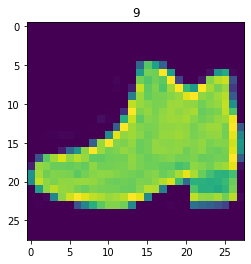

In [ ]:
import matplotlib.pyplot as plt

plt.title(y_train[15])
plt.imshow(X_train[15]);

In [ ]:
X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf
import os

logdir = os.path.join("logs", "EarlyStopping-Loss")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4750 - accuracy: 0.8263 - val_loss: 0.4017 - val_accuracy: 0.8550
Epoch 2/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3550 - accuracy: 0.8699 - val_loss: 0.3697 - val_accuracy: 0.8680
Epoch 3/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3212 - accuracy: 0.8810 - val_loss: 0.3608 - val_accuracy: 0.8744
Epoch 4/99
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2983 - accuracy: 0.8903 - val_loss: 0.3768 - val_accuracy: 0.8624
Epoch 5/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2843 - accuracy: 0.8941 - val_loss: 0.3528 - val_accuracy: 0.8710
Epoch 6/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2694 - accuracy: 0.9002 - val_loss: 0.3462 - val_accuracy: 0.8779
Epoch 7/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2580 - accuracy: 0.9022 - val_loss: 0.3450 - val_accuracy:

In [ ]:
%tensorboard --logdir logs

### L1/L2 regularization

```python
Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
Dense(64, input_dim=64, kernel_regularizer=regularizers.l1(0.01))
```

Note:

The terms "L2 regularization" and "weight decay" are often used interchagebly, but they only mean the same thing for vanilla SGD optimization. 

They mean different things for all other optimizers based on SGD (Adam, AdamW, RSMProp, etc).
See:
- https://www.fast.ai/2018/07/02/adam-weight-decay/
- https://arxiv.org/pdf/1711.05101.pdf
- https://bbabenko.github.io/weight-decay/


In [ ]:
from tensorflow.keras import regularizers

logdir = os.path.join("logs", "EarlyStopping+L2_WeightDecay")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 19s 10ms/step - loss: 1.2573 - accuracy: 0.7791 - val_loss: 0.7508 - val_accuracy: 0.8066
Epoch 2/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7141 - accuracy: 0.8132 - val_loss: 0.6956 - val_accuracy: 0.8119
Epoch 3/99
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6599 - accuracy: 0.8249 - val_loss: 0.6596 - val_accuracy: 0.8281
Epoch 4/99
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6265 - accuracy: 0.8329 - val_loss: 0.6232 - val_accuracy: 0.8291
Epoch 5/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6101 - accuracy: 0.8350 - val_loss: 0.6394 - val_accuracy: 0.8309
Epoch 6/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5959 - accuracy: 0.8403 - val_loss: 0.5873 - val_accuracy: 0.8393
Epoch 7/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5869 - accuracy: 0.8407 - val_loss: 0.6030 - 

### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

In [ ]:
from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99,
          validation_data=(X_test, y_test),
          callbacks=[stop])

Epoch 1/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4680 - accuracy: 0.8289 - val_loss: 0.3891 - val_accuracy: 0.8579
Epoch 2/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3498 - accuracy: 0.8722 - val_loss: 0.3795 - val_accuracy: 0.8600
Epoch 3/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3222 - accuracy: 0.8809 - val_loss: 0.3429 - val_accuracy: 0.8757
Epoch 4/99
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3062 - accuracy: 0.8849 - val_loss: 0.3442 - val_accuracy: 0.8778
Epoch 5/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2967 - accuracy: 0.8899 - val_loss: 0.3407 - val_accuracy: 0.8765
Epoch 6/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2898 - accuracy: 0.8916 - val_loss: 0.3745 - val_accuracy: 0.8663
Epoch 7/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2835 - accuracy: 0.8936 - val_loss: 0.3607 -

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
re_lu_12 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
re_lu_13 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
re_lu_14 (ReLU)              (None, 256)              

### Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

logdir = os.path.join("logs", "EarlyStopping+WeightConstraint+Dropout")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.5171 - accuracy: 0.8117 - val_loss: 0.4905 - val_accuracy: 0.8266
Epoch 2/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4001 - accuracy: 0.8551 - val_loss: 0.3879 - val_accuracy: 0.8634
Epoch 3/99
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3758 - accuracy: 0.8634 - val_loss: 0.3728 - val_accuracy: 0.8659
Epoch 4/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3615 - accuracy: 0.8666 - val_loss: 0.3817 - val_accuracy: 0.8579
Epoch 5/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3566 - accuracy: 0.8702 - val_loss: 0.3690 - val_accuracy: 0.8641
Epoch 6/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3501 - accuracy: 0.8717 - val_loss: 0.3664 - val_accuracy: 0.8656
Epoch 7/99
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3463 - accuracy: 0.8730 - val_loss: 0.3651 -

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
re_lu_15 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_16 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [ ]:
%tensorboard --logdir logs

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---

# Deploy (Learn)

## Overview

You've built a dope image classification model, but it's just sitting your Jupyter Notebook. What now? Well you deploy to some down stream application. TensorFlow supports three ways of deploying it's models: 

- In-Browser with TensorFlow.js
- API with TensorFlow Serving (TFX) or another Framework
- On-Device with TensorFlow Lite

You are already familiar with deploying a model as an API from Unit 3, so we will focus on deploying a model in browser. Both methods rely on the same core idea: save your weights and architecture information, load those parameters into application, and perform inference. 



## Follow Along

### Train Your Model

In [ ]:
import tensorflow as tf

# Save the latest (best) weights of your model at the end of each epoch
cpoint = tf.keras.callbacks.ModelCheckpoint("weights_best.h5",
                                            verbose=1,
                                            save_weights_only=True)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

def create_model():
  model = tf.keras.Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
                metrics=['accuracy'])

  return model


model = create_model()
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_test, y_test),
          verbose=2,
          callbacks=[cpoint, stop])

Epoch 1/10

Epoch 00001: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.4724 - accuracy: 0.8291 - val_loss: 0.4045 - val_accuracy: 0.8531
Epoch 2/10

Epoch 00002: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.3519 - accuracy: 0.8707 - val_loss: 0.3965 - val_accuracy: 0.8554
Epoch 3/10

Epoch 00003: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.3181 - accuracy: 0.8827 - val_loss: 0.3516 - val_accuracy: 0.8760
Epoch 4/10

Epoch 00004: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.2957 - accuracy: 0.8894 - val_loss: 0.3580 - val_accuracy: 0.8698
Epoch 5/10

Epoch 00005: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.2793 - accuracy: 0.8954 - val_loss: 0.3358 - val_accuracy: 0.8823
Epoch 6/10

Epoch 00006: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.2664 - accuracy: 0.9007 - val_loss: 0.3247 - val_accuracy: 0.8828
Epoch 7/10

Epoch 00007: saving model to weights_best.h5
1875/1875 - 7s - loss: 0.2541 - accuracy: 0.9046 - val_

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_18 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_19 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_20 (ReLU)              (None, 128)              

In [ ]:
model.evaluate(X_test, y_test)  # Model val metrics after full training

313/313 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8831


[0.33429473638534546, 0.8830999732017517]

### Save / Export, Import Your Model

In [ ]:
del model
model

NameError: ignored

In [ ]:
model = create_model()  # Recreate basic model architecture (and compiling)
# But we've not trained it, and that's the expensive step
# Instead let's just load the best weights from last time
model.load_weights('weights_best.h5')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_24 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_25 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_26 (ReLU)              (None, 128)              

In [ ]:
model.evaluate(X_test, y_test)  # Model val metrics after full training

313/313 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8831


[0.33429473638534546, 0.8830999732017517]

In [ ]:
model.predict

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f06a0131fd0>>

In [ ]:
# We can also save the entire model, not just weights
# That way we don't need to create_model() function
# Note - this saves architecture, but seems to lose some .compile details
# i.e. you might still need to recompile to know which metrics to use, etc.

# Create and train a new model instance.
model = create_model()
model.fit(X_train, y_train, epochs=5)

# Save the entire model as a SavedModel. *Not* a callback, just save at the end.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4763 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3514 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3193 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2964 - accuracy: 0.8896
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2825 - accuracy: 0.8936
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
model.summary()  # Model as trained

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_27 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_28 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_29 (ReLU)              (None, 128)              

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_27 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_28 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_29 (ReLU)              (None, 128)              

In [ ]:
model.evaluate(X_test, y_test)  # Trained model

313/313 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8783


[0.34104838967323303, 0.8783000111579895]

In [ ]:
new_model.evaluate(X_test, y_test)  # Saved/loaded model

313/313 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.0875


[0.34104838967323303, 0.08749999850988388]

In [ ]:
# Why is second number different? Because that metric is specified w/.compile!
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
                  metrics=['accuracy'])
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8783


[0.34104838967323303, 0.8783000111579895]

### Move Weights to Web Application

Not all models are small enough to work well in-browser. Many neural networks are deploy as micro-service APIs. Micro-service APIs are the architecture you studied during Unit 3. 

## Challenge

You will be expected to be able to export your model weights and architecture on the assignment.

# Custom Callbacks (Learn)

## Overview

Custom callbacks all you to access data at any point during the training: on batch end, on epoch end, on epoch start, on batch start. Our use case today is a simple one. Let's stop training once we reach a benchmark accuracy.

## Follow Along

In [ ]:
# https://www.tensorflow.org/guide/keras/custom_callback

## Challenge

Experiment with improving our custom callback function. 